## ST 4052 Project 1 Ranushi

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:

rs=73

In [26]:
df=pd.read_csv("alzheimers_disease_data.csv")

In [27]:
#df=pd.read_csv("C:\\Users\\hp\\Desktop\\Anemia detection\\Anemia.CSV")

In [28]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [29]:
rows , col = df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 2149 
Number of Columns : 35


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [31]:
df = df.drop(columns=['PatientID','DoctorInCharge','CholesterolTotal'])

In [32]:
## counting NAN values
df.isnull().sum()


Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosis                    0
dtype: i

In [33]:
df.duplicated().sum()

0

In [34]:
##recode the MMSE
# Define bin edges and labels
bins = [0, 24, 30]
labels = ['0', '1'] ##0-24 as 0 25-30 as 1

# Create a new column with categorical data
df['MMSE'] = pd.cut(df['MMSE'], bins=bins, labels=labels)

print(df)

      Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0      73       0          0               2  22.927749        0   
1      89       0          0               0  26.827681        0   
2      73       0          3               1  17.795882        0   
3      74       1          0               1  33.800817        1   
4      89       0          0               0  20.716974        0   
...   ...     ...        ...             ...        ...      ...   
2144   61       0          0               1  39.121757        0   
2145   75       0          0               2  17.857903        0   
2146   77       0          0               1  15.476479        0   
2147   78       1          3               1  15.299911        0   
2148   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0              13.297218          6.327112     1.347214      9.025679  ...   
1               4.542524   

In [35]:
# Convert specific columns to categorical dtype
categorical_columns = ['Gender', 'EducationLevel','Ethnicity','Smoking','FamilyHistoryAlzheimers','CardiovascularDisease','Diabetes',
                      'Depression','HeadInjury','Hypertension','MemoryComplaints','BehavioralProblems',
                      'Confusion','Disorientation','PersonalityChanges','DifficultyCompletingTasks',
                      'Forgetfulness','Diagnosis']  # Add more columns as needed
for col in categorical_columns:
    df[col] = df[col].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        2149 non-null   int64   
 1   Gender                     2149 non-null   category
 2   Ethnicity                  2149 non-null   category
 3   EducationLevel             2149 non-null   category
 4   BMI                        2149 non-null   float64 
 5   Smoking                    2149 non-null   category
 6   AlcoholConsumption         2149 non-null   float64 
 7   PhysicalActivity           2149 non-null   float64 
 8   DietQuality                2149 non-null   float64 
 9   SleepQuality               2149 non-null   float64 
 10  FamilyHistoryAlzheimers    2149 non-null   category
 11  CardiovascularDisease      2149 non-null   category
 12  Diabetes                   2149 non-null   category
 13  Depression                 2149 n

In [36]:
summary = df["MMSE"].describe()

print(summary)

count     2149
unique       2
top          0
freq      1734
Name: MMSE, dtype: object


In [37]:
df["Diagnosis"].value_counts()

Diagnosis
0    1389
1     760
Name: count, dtype: int64

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


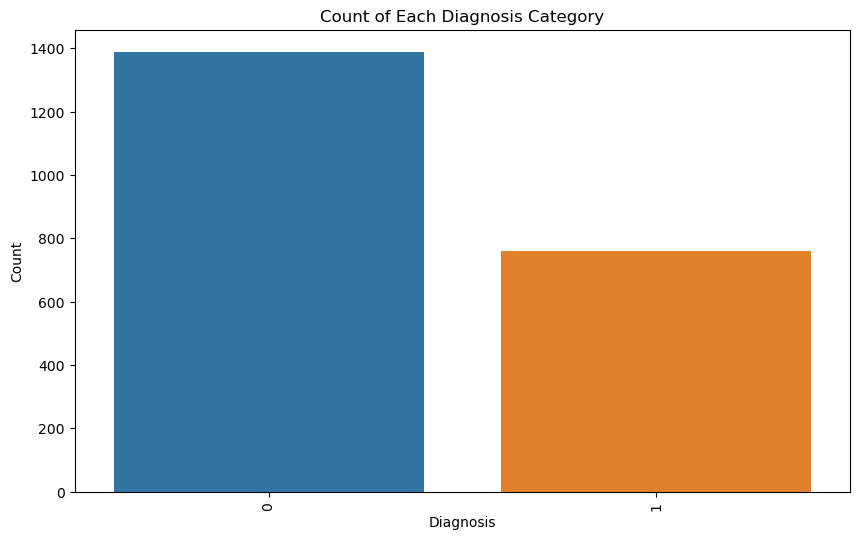

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Diagnosis', data=df)
plt.title('Count of Each Diagnosis Category')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [39]:
df.head(20)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0
5,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,7.261953,...,5.510144,0,0,9.015686,1,0,0,0,0,0
6,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,5.477686,...,6.062124,0,0,9.236328,0,0,0,0,1,0
7,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,4.213210,...,3.401374,0,0,4.517248,1,0,0,0,1,1
8,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,5.748224,...,7.396061,0,1,0.756232,0,0,1,0,0,0
9,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,7.551773,...,1.148904,0,1,4.554394,0,0,0,0,0,0


In [40]:
###splitting the dataset
from sklearn.model_selection import train_test_split
x=df.drop(columns='Diagnosis')
y=df['Diagnosis']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)
x_train.describe()
y_train.describe()
x_test.describe()
y_test.describe()


count     430
unique      2
top         0
freq      278
Name: Diagnosis, dtype: int64

In [41]:
print(x_train)
print(y_train)

      Age Gender Ethnicity EducationLevel        BMI Smoking  \
780    86      0         2              1  28.155961       0   
1341   62      1         0              3  28.189210       1   
820    75      0         0              0  25.391526       0   
857    89      0         0              0  23.581751       0   
593    76      1         0              2  38.768590       1   
...   ...    ...       ...            ...        ...     ...   
1317   60      0         0              1  31.425226       0   
711    60      0         0              0  20.352158       0   
199    75      1         3              1  20.623038       1   
319    76      1         0              0  33.598266       0   
802    67      1         0              2  17.009943       0   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
780            18.629164          6.535593     1.316452      9.620590  ...   
1341            7.763349          1.913491     6.023577      5.039160  ... 

In [42]:
x_train

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
780,86,0,2,1,28.155961,0,18.629164,6.535593,1.316452,9.620590,...,0,5.566873,0,0,0.232938,0,0,0,0,1
1341,62,1,0,3,28.189210,1,7.763349,1.913491,6.023577,5.039160,...,0,9.307896,0,0,0.442326,0,0,0,0,0
820,75,0,0,0,25.391526,0,8.449637,9.549369,1.774418,7.951681,...,0,4.001694,0,0,4.918146,0,0,0,0,0
857,89,0,0,0,23.581751,0,1.939227,1.322465,8.758693,9.262999,...,1,9.700073,1,0,5.157190,0,1,0,0,1
593,76,1,0,2,38.768590,1,9.013919,8.296794,7.892595,5.928934,...,1,8.626984,0,0,9.413984,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,60,0,0,1,31.425226,0,1.742579,2.689362,3.266146,5.880669,...,0,4.408669,0,0,3.027579,0,0,0,0,0
711,60,0,0,0,20.352158,0,16.789335,3.376786,1.736764,7.633571,...,0,4.496684,0,0,6.747443,0,0,1,0,1
199,75,1,3,1,20.623038,1,5.959683,9.874975,1.484483,9.443387,...,0,1.157719,0,0,9.116986,0,0,0,0,0
319,76,1,0,0,33.598266,0,5.284436,9.476723,2.873511,6.415073,...,0,2.391914,0,0,0.905049,1,0,0,0,0


In [43]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1719 entries, 780 to 802
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1719 non-null   int64   
 1   Gender                     1719 non-null   category
 2   Ethnicity                  1719 non-null   category
 3   EducationLevel             1719 non-null   category
 4   BMI                        1719 non-null   float64 
 5   Smoking                    1719 non-null   category
 6   AlcoholConsumption         1719 non-null   float64 
 7   PhysicalActivity           1719 non-null   float64 
 8   DietQuality                1719 non-null   float64 
 9   SleepQuality               1719 non-null   float64 
 10  FamilyHistoryAlzheimers    1719 non-null   category
 11  CardiovascularDisease      1719 non-null   category
 12  Diabetes                   1719 non-null   category
 13  Depression                 1719 non-n

In [22]:
y_train

780     0
1341    0
820     1
857     0
593     0
       ..
1317    1
711     0
199     0
319     1
802     0
Name: Diagnosis, Length: 1719, dtype: category
Categories (2, int64): [0, 1]

In [23]:
##### EDA

In [22]:
#CardiovascularDisease

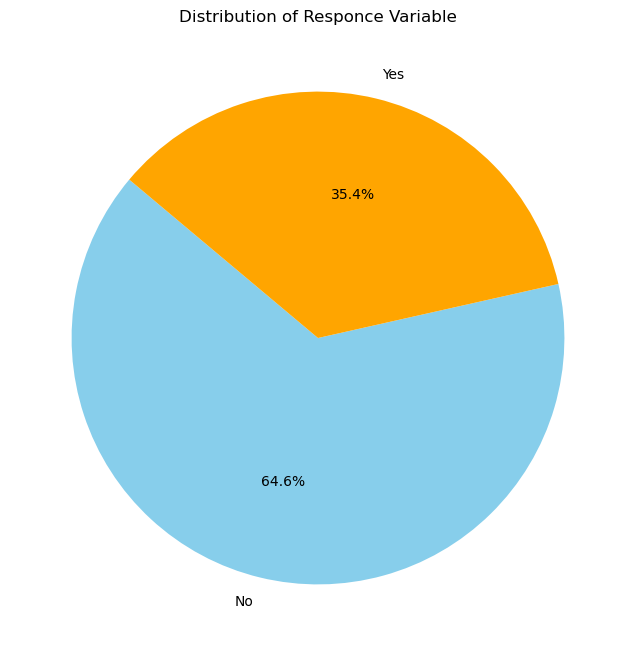

In [23]:
# Map the numeric values to labels
Diagnosis_labels = {0: 'No', 1: 'Yes'}
y_train= y_train.map(Diagnosis_labels)

# Count the occurrences of each category in 'CardiovascularDisease'
Diagnosis_counts = y_train.value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(Diagnosis_counts, labels=Diagnosis_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Distribution of Responce Variable')
plt.show()

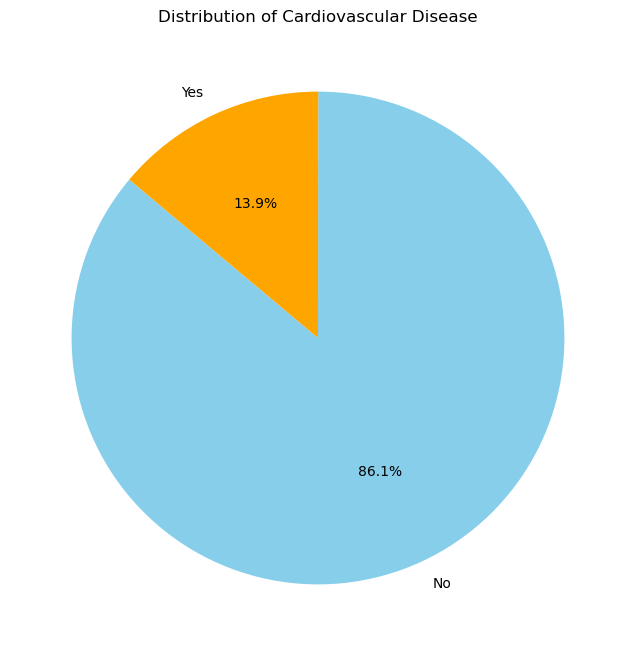

In [53]:
# Map the numeric values to labels
cardio_labels = {0: 'No', 1: 'Yes'}
x_train['CardiovascularDisease'] = x_train['CardiovascularDisease'].map(cardio_labels)

# Count the occurrences of each category in 'CardiovascularDisease'
cardio_counts = x_train['CardiovascularDisease'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cardio_counts, labels=cardio_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Distribution of Cardiovascular Disease')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6816\546159998.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df2.groupby(['CardiovascularDisease','Diagnosis']).size().unstack(fill_value=0)


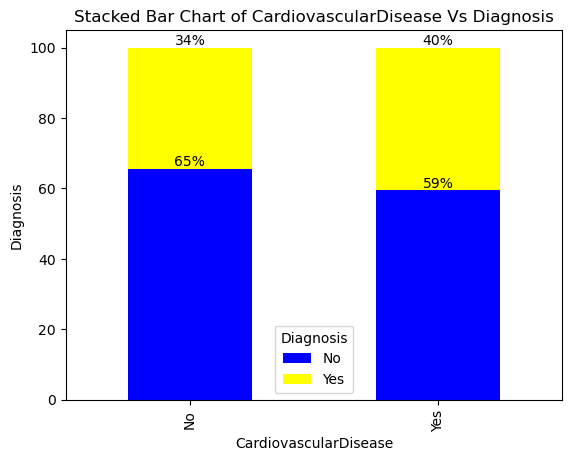

In [55]:
df2 = pd.concat([x_train,y_train], axis=1)
grouped_df = df2.groupby(['CardiovascularDisease','Diagnosis']).size().unstack(fill_value=0)

# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['blue', 'yellow'])

# Add labels and title
plt.xlabel('CardiovascularDisease')
plt.ylabel('Diagnosis')
plt.title('Stacked Bar Chart of CardiovascularDisease Vs Diagnosis')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['No', 'Yes'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'],title='Diagnosis')

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

In [57]:
# Diabetes


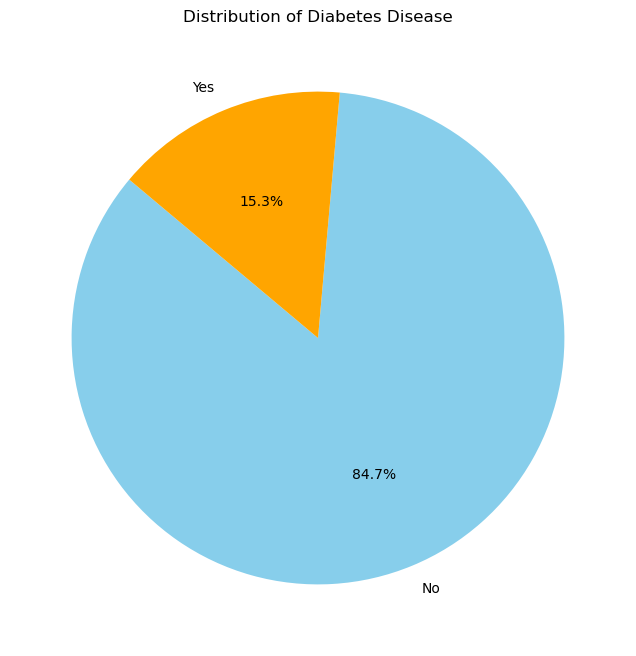

In [59]:
# Map the numeric values to labels
diabetes_labels = {0: 'No', 1: 'Yes'}
x_train['Diabetes'] = x_train['Diabetes'].map(diabetes_labels)

# Count the occurrences of each category in 'CardiovascularDisease'
diabetes_counts = x_train['Diabetes'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Distribution of Diabetes Disease')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6816\3408640878.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df2.groupby(['Diagnosis','Diabetes']).size().unstack(fill_value=0)


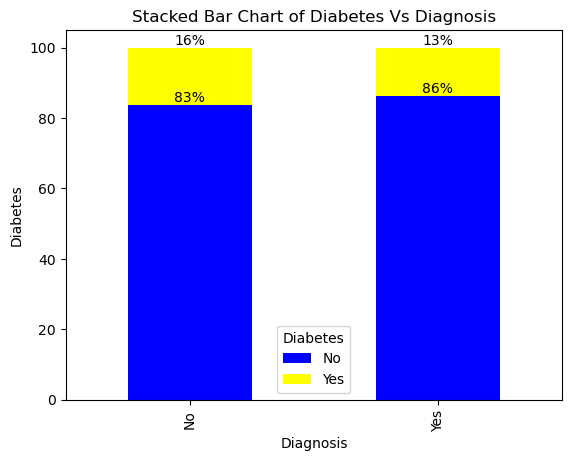

In [61]:

grouped_df = df2.groupby(['Diagnosis','Diabetes']).size().unstack(fill_value=0)

# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['blue', 'yellow'])

# Add labels and title
plt.xlabel('Diagnosis')
plt.ylabel('Diabetes')
plt.title('Stacked Bar Chart of Diabetes Vs Diagnosis')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['No', 'Yes'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'],title='Diabetes')

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

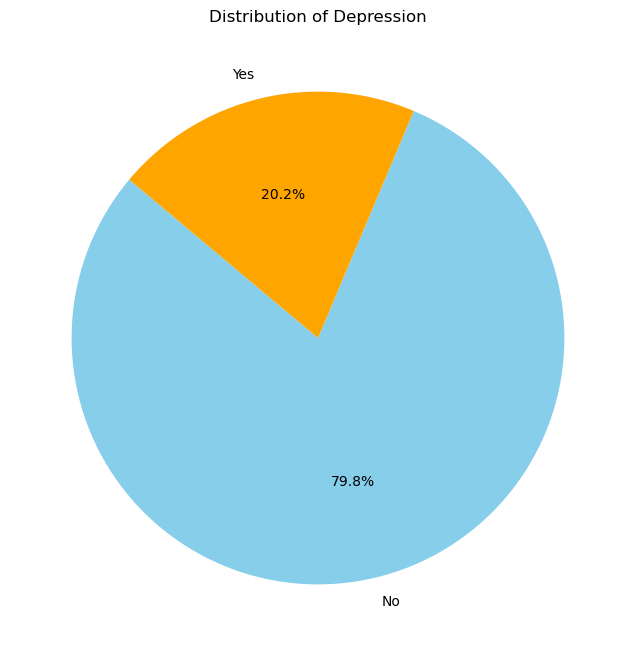

In [63]:
#Depression
# Map the numeric values to labels
Depression_labels = {0: 'No', 1: 'Yes'}
x_train['Depression'] = x_train['Depression'].map(Depression_labels)

# Count the occurrences of each category in 'CardiovascularDisease'
Depression_counts = x_train['Depression'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(Depression_counts, labels=Depression_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Distribution of Depression')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6816\698573922.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df2.groupby(['Diagnosis','Depression']).size().unstack(fill_value=0)


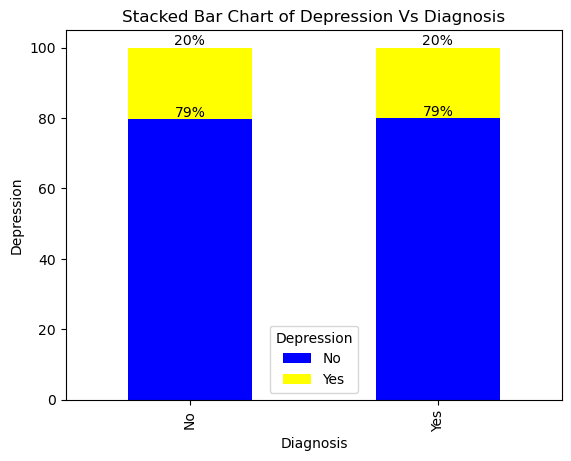

In [65]:
grouped_df = df2.groupby(['Diagnosis','Depression']).size().unstack(fill_value=0)

# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['blue', 'yellow'])

# Add labels and title
plt.xlabel('Diagnosis')
plt.ylabel('Depression')
plt.title('Stacked Bar Chart of Depression Vs Diagnosis')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['No', 'Yes'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'],title='Depression')

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

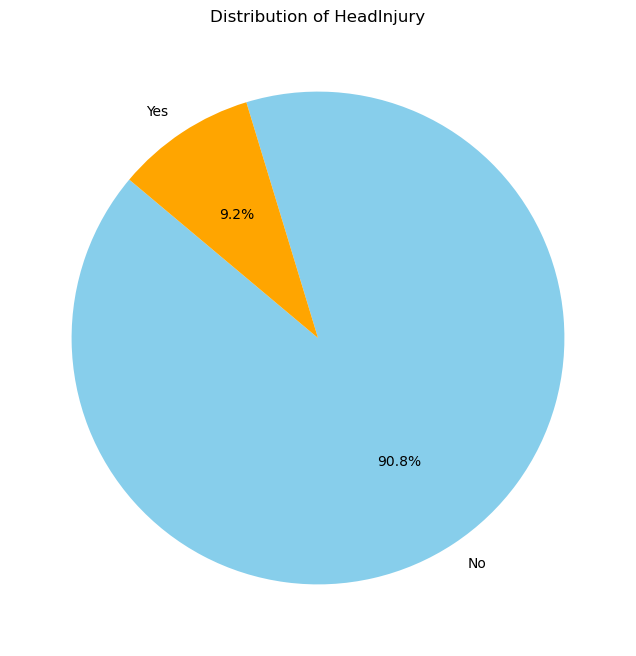

In [66]:
#HeadInjury
# Map the numeric values to labels
HeadInjury_labels = {0: 'No', 1: 'Yes'}
x_train['HeadInjury'] = x_train['HeadInjury'].map(HeadInjury_labels)

# Count the occurrences of each category in 'CardiovascularDisease'
HeadInjury_counts = x_train['HeadInjury'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(HeadInjury_counts, labels=HeadInjury_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Distribution of HeadInjury')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6816\1531232981.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df2.groupby(['Diagnosis','HeadInjury']).size().unstack(fill_value=0)


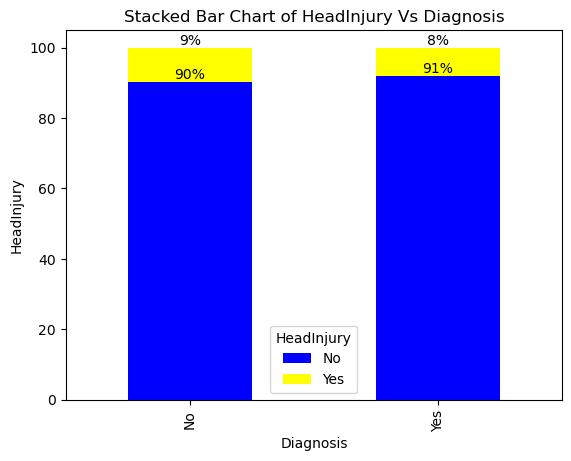

In [67]:
grouped_df = df2.groupby(['Diagnosis','HeadInjury']).size().unstack(fill_value=0)

# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['blue', 'yellow'])

# Add labels and title
plt.xlabel('Diagnosis')
plt.ylabel('HeadInjury')
plt.title('Stacked Bar Chart of HeadInjury Vs Diagnosis')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['No', 'Yes'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'],title='HeadInjury')

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

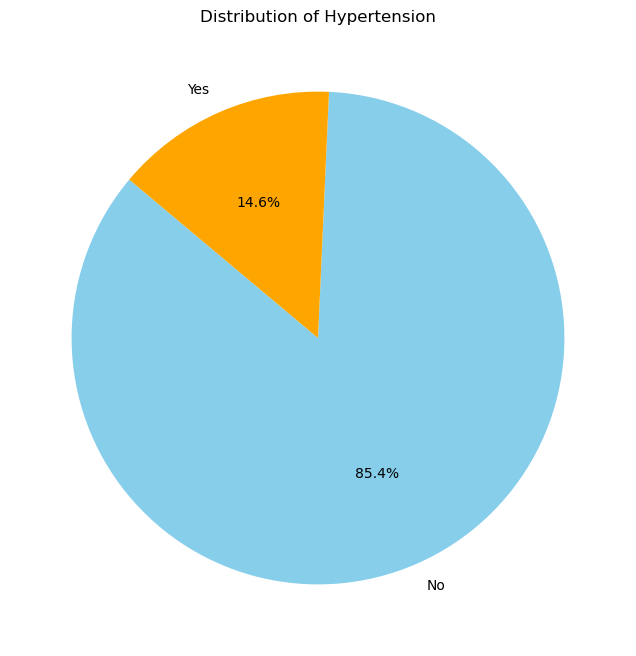

In [71]:
#Hypertension
# Map the numeric values to labels
Hypertension_labels = {0: 'No', 1: 'Yes'}
x_train['Hypertension'] = x_train['Hypertension'].map(Hypertension_labels)

# Count the occurrences of each category in 'CardiovascularDisease'
Hypertension_counts = x_train['Hypertension'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(Hypertension_counts, labels=Hypertension_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])
plt.title('Distribution of Hypertension')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6816\4214079585.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df2.groupby(['Diagnosis','Hypertension']).size().unstack(fill_value=0)


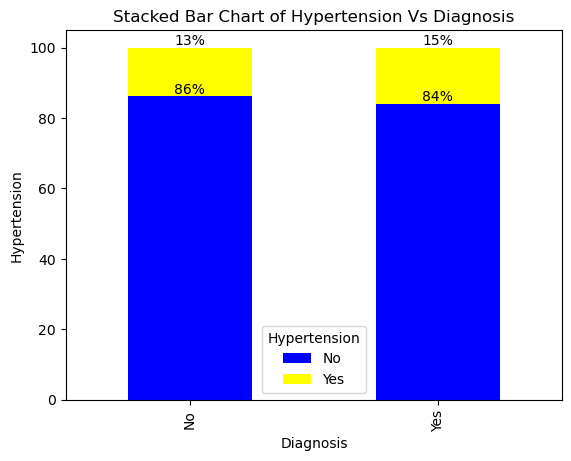

In [73]:
grouped_df = df2.groupby(['Diagnosis','Hypertension']).size().unstack(fill_value=0)

# Normalize the data to get percentages
grouped_df_percent = grouped_df.div(grouped_df.sum(axis=1), axis=0) * 100

# Plot
ax = grouped_df_percent.plot(kind='bar', stacked=True,color=['blue', 'yellow'])

# Add labels and title
plt.xlabel('Diagnosis')
plt.ylabel('Hypertension')
plt.title('Stacked Bar Chart of Hypertension Vs Diagnosis')

# Set the tick labels for both x-axis and legend
ax.set_xticklabels(['No', 'Yes'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'],title='Hypertension')

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(val)}%' for val in container.datavalues])

# Show plot
plt.show()

In [74]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1719 entries, 780 to 802
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1719 non-null   int64   
 1   Gender                     1719 non-null   category
 2   Ethnicity                  1719 non-null   category
 3   EducationLevel             1719 non-null   category
 4   BMI                        1719 non-null   float64 
 5   Smoking                    1719 non-null   category
 6   AlcoholConsumption         1719 non-null   float64 
 7   PhysicalActivity           1719 non-null   float64 
 8   DietQuality                1719 non-null   float64 
 9   SleepQuality               1719 non-null   float64 
 10  FamilyHistoryAlzheimers    1719 non-null   category
 11  CardiovascularDisease      1719 non-null   category
 12  Diabetes                   1719 non-null   category
 13  Depression                 1719 non-n

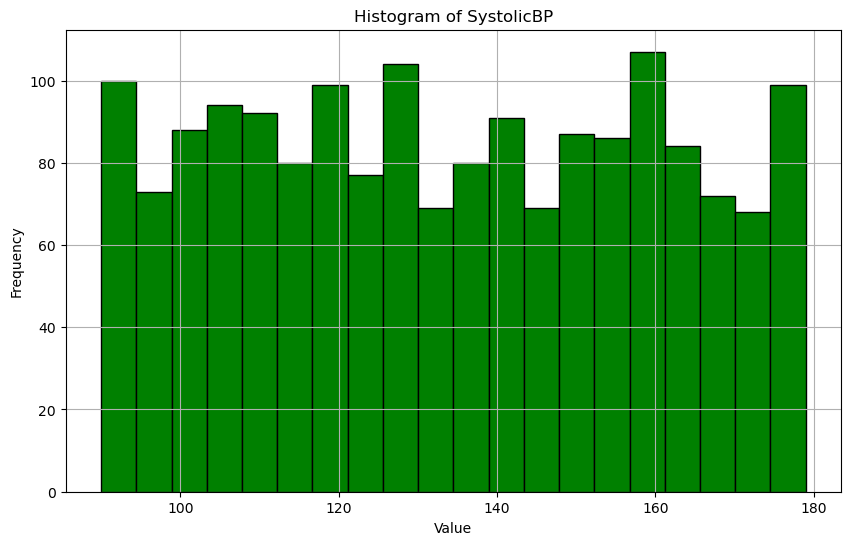

In [76]:

# SystolicBP
plt.figure(figsize=(10, 6))
#sns.histplot(x=x_train["SystolicBP"], bins=10, kde=True, color='blue', edgecolor='black')
plt.hist(x_train['SystolicBP'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of SystolicBP')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('histogram_SystolicBP.png')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


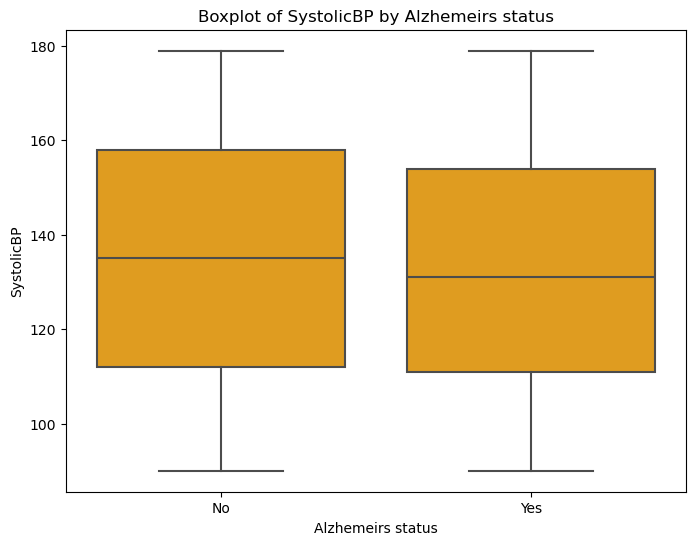

In [79]:
# Histogram
## boxplots of CholesterolTriglycerides and diagnosis
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='SystolicBP', data=df2, color = 'orange')

# Set the tick labels for the x-axis
plt.gca().set_xticklabels(['No', 'Yes'])
plt.xlabel('Alzhemeirs status')
plt.ylabel('SystolicBP')
plt.title('Boxplot of SystolicBP by Alzhemeirs status')
plt.show()

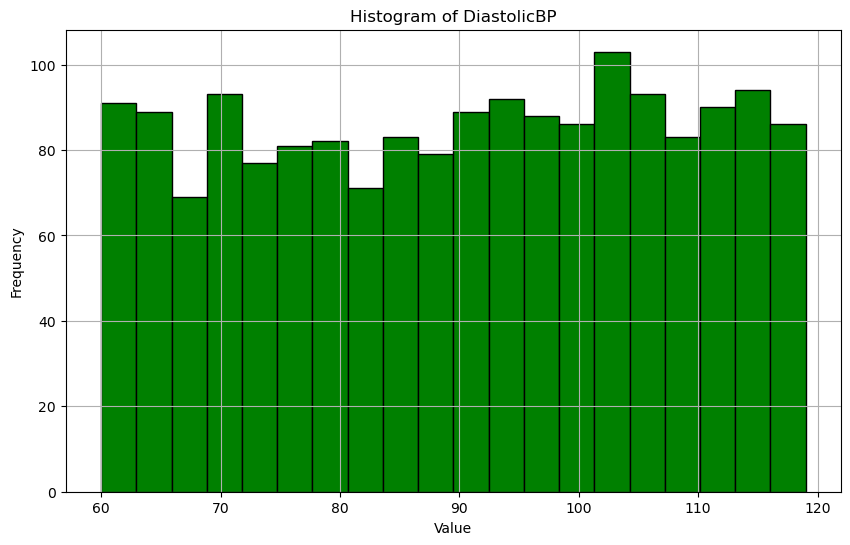

In [81]:
# DiastolicBP
plt.figure(figsize=(10, 6))
#sns.histplot(x=x_train["SystolicBP"], bins=10, kde=True, color='blue', edgecolor='black')
plt.hist(x_train['DiastolicBP'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of DiastolicBP')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('histogram_DiastolicBP.png')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


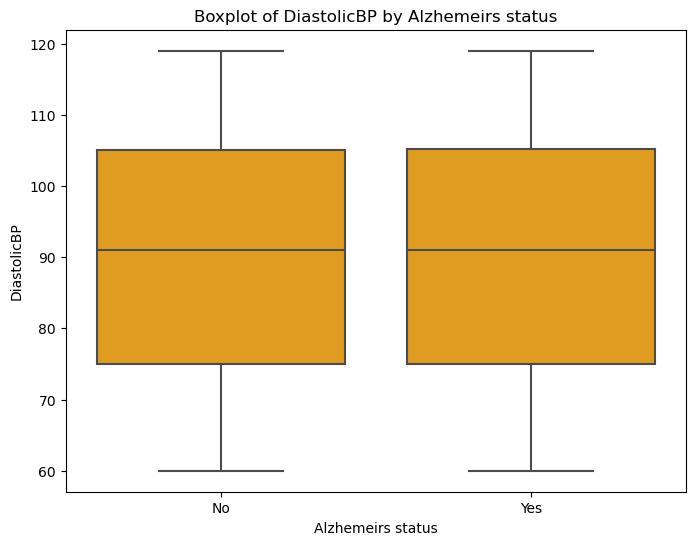

In [82]:
# Histogram
## boxplots of CholesterolTriglycerides and diagnosis
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='DiastolicBP', data=df2, color = 'orange')

# Set the tick labels for the x-axis
plt.gca().set_xticklabels(['No', 'Yes'])
plt.xlabel('Alzhemeirs status')
plt.ylabel('DiastolicBP')
plt.title('Boxplot of DiastolicBP by Alzhemeirs status')
plt.show()

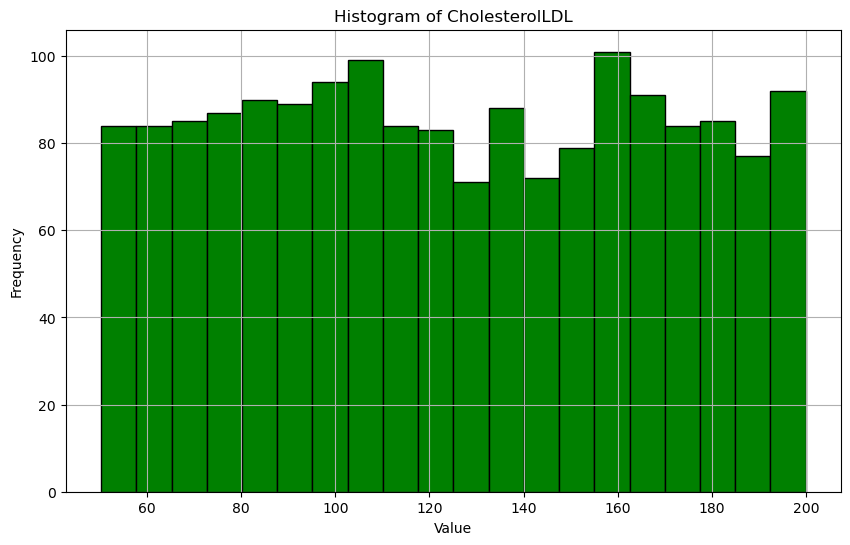

In [83]:
# DiastolicBP
plt.figure(figsize=(10, 6))
#sns.histplot(x=x_train["SystolicBP"], bins=10, kde=True, color='blue', edgecolor='black')
plt.hist(x_train['CholesterolLDL'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of CholesterolLDL')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('histogram_CholesterolLDL.png')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


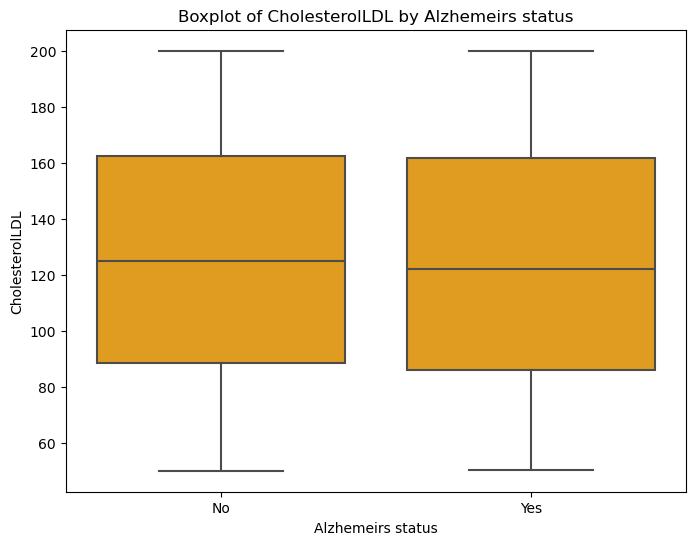

In [85]:
# Histogram
## boxplots of CholesterolTriglycerides and diagnosis
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='CholesterolLDL', data=df2, color = 'orange')

# Set the tick labels for the x-axis
plt.gca().set_xticklabels(['No', 'Yes'])
plt.xlabel('Alzhemeirs status')
plt.ylabel('CholesterolLDL')
plt.title('Boxplot of CholesterolLDL by Alzhemeirs status')
plt.show()

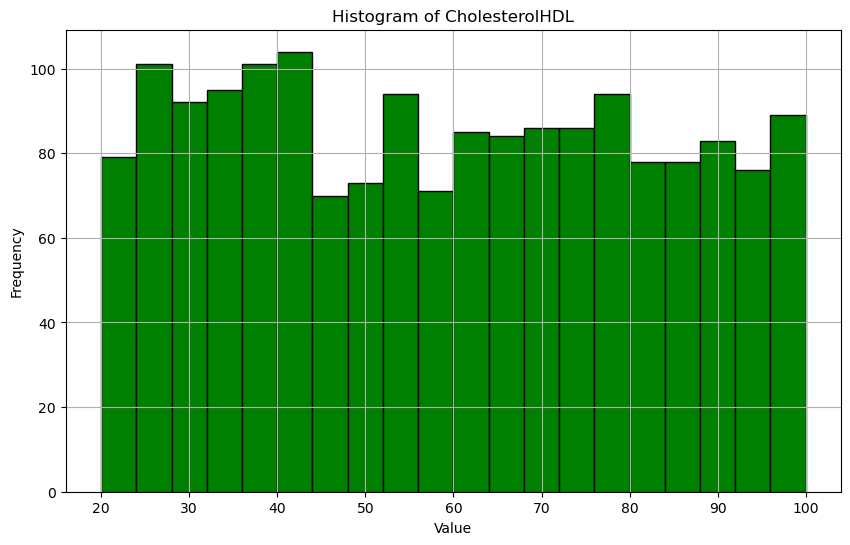

In [89]:
# CholesterolHDL
plt.figure(figsize=(10, 6))
#sns.histplot(x=x_train["SystolicBP"], bins=10, kde=True, color='blue', edgecolor='black')
plt.hist(x_train['CholesterolHDL'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of CholesterolHDL')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('histogram_CholesterolHDL.png')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


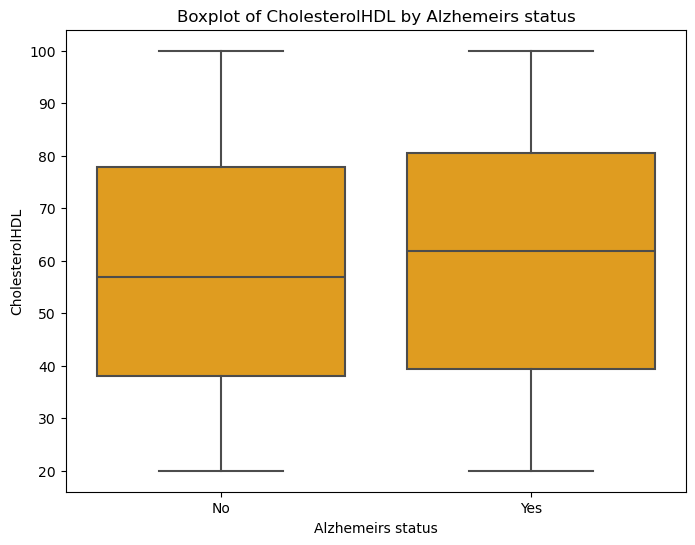

In [90]:
# Histogram
## boxplots of CholesterolTriglycerides and diagnosis
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='CholesterolHDL', data=df2, color = 'orange')

# Set the tick labels for the x-axis
plt.gca().set_xticklabels(['No', 'Yes'])
plt.xlabel('Alzhemeirs status')
plt.ylabel('CholesterolHDL')
plt.title('Boxplot of CholesterolHDL by Alzhemeirs status')
plt.show()

In [22]:
from prince import FAMD

In [23]:
# Assuming X_train and y_train are your training data and target variable, respectively
# Convert y_train to a DataFrame
y_train_df = pd.DataFrame(y_train)

# Concatenate X_train and y_train_df along the columns axis
df1 = pd.concat([x_train, y_train_df], axis=1)

# Display the resulting DataFrame
print(df1)


      Age Gender Ethnicity EducationLevel        BMI Smoking  \
780    86      0         2              1  28.155961       0   
1341   62      1         0              3  28.189210       1   
820    75      0         0              0  25.391526       0   
857    89      0         0              0  23.581751       0   
593    76      1         0              2  38.768590       1   
...   ...    ...       ...            ...        ...     ...   
1317   60      0         0              1  31.425226       0   
711    60      0         0              0  20.352158       0   
199    75      1         3              1  20.623038       1   
319    76      1         0              0  33.598266       0   
802    67      1         0              2  17.009943       0   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
780            18.629164          6.535593     1.316452      9.620590  ...   
1341            7.763349          1.913491     6.023577      5.039160  ... 

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1719 entries, 780 to 802
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1719 non-null   int64   
 1   Gender                     1719 non-null   category
 2   Ethnicity                  1719 non-null   category
 3   EducationLevel             1719 non-null   category
 4   BMI                        1719 non-null   float64 
 5   Smoking                    1719 non-null   category
 6   AlcoholConsumption         1719 non-null   float64 
 7   PhysicalActivity           1719 non-null   float64 
 8   DietQuality                1719 non-null   float64 
 9   SleepQuality               1719 non-null   float64 
 10  FamilyHistoryAlzheimers    1719 non-null   category
 11  CardiovascularDisease      1719 non-null   category
 12  Diabetes                   1719 non-null   category
 13  Depression                 1719 non-n

In [25]:
famd = FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"  # same parameter as sklearn.preprocessing.OneHotEncoder
)
famd = famd.fit(df1)

# Apply FAMD
famd = prince.FAMD(n_components=2, random_state=rs)
famd = famd.fit(df1)

# Transform the data
x_famd = famd.transform(df1)

# Calculate explained variance from singular values
explained_variance_ratio = (famd.eigenvalues_ / famd.eigenvalues_.sum())[:2]

# Print transformed data
print(x_famd.head())


C:\Users\DELL\anaconda3\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.6092175433497239, -0.59862164734704, -0.5932527348830258, -0.5656442886785986, -0.548412484937966, -0.6247745375765211, -0.6144469744016705, -0.6881359769302738, -0.5306213772144425, -0.639953459622525, -0.6498758103941302, -0.576846253144897, -0.49956350930134985, -0.6298748225086078, -0.5122126885172493, -0.5366172893070499, -0.5425469421253247, -0.5184215538578262, -0.5599592771697094, -0.6644815848571807, -3.064936153364392, -1.2673461941395032, -3.077437644358639, -1.2366800496023018, -2.956539964742248, -1.5029542364562896, -2.961945966632336, -1.4922721235587149, -3.052383461081616, -1.2972876344571453, -2.6663394214565095, -1.9724690338727677, -0.35774485953803326, -0.5059276322279445, -0.4453887582945096, -0.43814618198591065, -0.4307818561203992, -0.3393865732071592, -0.40789189730080844, -0.39997091226407816, -0.4525154309428789, -0.415

NameError: name 'prince' is not defined

In [26]:
import prince
# Apply FAMD
famd = prince.FAMD(n_components=10, random_state=rs)
famd = famd.fit(df1)

# Transform the data
x_famd = famd.transform(df1)

# Calculate explained variance from singular values
explained_variance_ratio = (famd.eigenvalues_ / famd.eigenvalues_.sum())[:2]

# Print transformed data
print(x_famd.head())

C:\Users\DELL\anaconda3\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.6092175433497239, -0.59862164734704, -0.5932527348830258, -0.5656442886785986, -0.548412484937966, -0.6247745375765211, -0.6144469744016705, -0.6881359769302738, -0.5306213772144425, -0.639953459622525, -0.6498758103941302, -0.576846253144897, -0.49956350930134985, -0.6298748225086078, -0.5122126885172493, -0.5366172893070499, -0.5425469421253247, -0.5184215538578262, -0.5599592771697094, -0.6644815848571807, -3.064936153364392, -1.2673461941395032, -3.077437644358639, -1.2366800496023018, -2.956539964742248, -1.5029542364562896, -2.961945966632336, -1.4922721235587149, -3.052383461081616, -1.2972876344571453, -2.6663394214565095, -1.9724690338727677, -0.35774485953803326, -0.5059276322279445, -0.4453887582945096, -0.43814618198591065, -0.4307818561203992, -0.3393865732071592, -0.40789189730080844, -0.39997091226407816, -0.4525154309428789, -0.415

component         0         1         2         3         4         5  \
780       -4.650186  2.239559 -7.235951 -2.304271  3.435365  3.100700   
1341      -0.899441  4.484233  4.055721 -6.382304 -5.814112  1.176348   
820        4.213389  9.219422 -4.017730 -0.278807  2.945614  4.546556   
857        3.778654  1.334855  1.539310  2.330768  1.912367  3.804903   
593       -3.564184 -3.411402 -1.151612  6.624687 -1.847820 -1.135080   

component         6         7         8         9  
780       -9.010741  5.117109 -1.987361  1.181465  
1341       0.713673 -4.658078  1.805823 -7.146011  
820        1.197503  8.259151  4.281927  5.524368  
857        8.625002 -4.262737 -2.325005  1.412526  
593        4.314285 -3.569134 -2.944554  1.840196  


C:\Users\DELL\anaconda3\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.6092175433497239, -0.59862164734704, -0.5932527348830258, -0.5656442886785986, -0.548412484937966, -0.6247745375765211, -0.6144469744016705, -0.6881359769302738, -0.5306213772144425, -0.639953459622525, -0.6498758103941302, -0.576846253144897, -0.49956350930134985, -0.6298748225086078, -0.5122126885172493, -0.5366172893070499, -0.5425469421253247, -0.5184215538578262, -0.5599592771697094, -0.6644815848571807, -3.064936153364392, -1.2673461941395032, -3.077437644358639, -1.2366800496023018, -2.956539964742248, -1.5029542364562896, -2.961945966632336, -1.4922721235587149, -3.052383461081616, -1.2972876344571453, -2.6663394214565095, -1.9724690338727677, -0.35774485953803326, -0.5059276322279445, -0.4453887582945096, -0.43814618198591065, -0.4307818561203992, -0.3393865732071592, -0.40789189730080844, -0.39997091226407816, -0.4525154309428789, -0.415

In [60]:
eig_sum = famd.eigenvalues_summary
eig_sum

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,17.785,0.80%,0.80%
1,16.720,0.75%,1.55%
2,16.468,0.74%,2.30%
3,16.012,0.72%,3.02%
4,15.949,0.72%,3.73%
5,15.653,0.70%,4.44%
6,15.499,0.70%,5.14%
7,15.397,0.69%,5.83%
8,15.157,0.68%,6.51%


In [ ]:
c = eig_sum['% of variance']
c

In [ ]:
famd.row_coordinates(df1).head()

In [ ]:
col=famd.column_coordinates_
col

In [115]:
from prince import FAMD

In [213]:
#famd = FAMD(
#    n_components=2,
#    n_iter=100,
#    copy=True,
#    check_input=True,
#    random_state=42,
#    engine="sklearn",
#    handle_unknown="error"  # same parameter as sklearn.preprocessing.OneHotEncoder
#)
#famd = famd.fit(x_train)

In [215]:
#eig_sum = famd.eigenvalues_summary
#eig_sum

In [164]:
# Fit FAMD without specifying the number of components to get all
famd_full = prince.FAMD(
    n_iter=3,
    random_state=42
)
famd_full = famd_full.fit(x_train)


C:\Users\DELL\anaconda3\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.5952106700238972, -0.5848583904020996, -0.5796129177135838, -0.552639233283386, -0.535803615921175, -0.6104099843876569, -0.6003198681982612, -0.6723146441977836, -0.5184215538578262, -0.6252399190470668, -0.6349341393062311, -0.5635836468977882, -0.4880777553709635, -0.6153930057153889, -0.5004361099826031, -0.52427961046339, -0.530072931199967, -0.5065022237046951, -0.5470849291661833, -0.6492041039506662, -2.9944684314142425, -1.238207903893173, -3.006682493389657, -1.2082468224432266, -2.8885644423349492, -1.4683989452727706, -2.893846151705066, -1.4579624310186392, -2.9822043453487725, -1.267460943217935, -0.3495197403089267, -0.4942955570620063, -0.4351485674361233, -0.428072509393478, -0.4208775010084862, -0.3315835399700317, -0.3985138184872708, -0.3907749494044167, -0.44211138662670885, -0.4061052400161642, -0.36657939624613584, -0.413557

In [166]:
# Retrieve the eigenvalues
eigenvalues = famd.eigenvalues_
eigenvalues

array([15.58164107, 15.46011317, 15.22420155, 15.14722519, 14.83775529])

In [168]:
# Calculate the total variance (sum of all eigenvalues)
total_variance = sum(eigenvalues)

# Calculate the variance explained by the first two components
variance_first_two_components = sum(eigenvalues[:2]) / total_variance
variance_first_two_components

0.40709997486232335

In [146]:
# Print the cumulative variance explained by the first two components
print(f"Percentage of variance explained by the first two components: {variance_first_two_components * 100:.2f}%")

Percentage of variance explained by the first two components: 21.21%


In [106]:
import prince
from sklearn.preprocessing import StandardScaler


In [148]:
# Apply FAMD
famd = prince.FAMD(n_components=10, random_state=rs)
famd = famd.fit(x_train)

# Transform the data
x_famd = famd.transform(x_train)

# Calculate explained variance from singular values
explained_variance_ratio = (famd.eigenvalues_ / famd.eigenvalues_.sum())[:2]

# Print transformed data
print(x_famd.head())


C:\Users\DELL\anaconda3\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.5952106700238972, -0.5848583904020996, -0.5796129177135838, -0.552639233283386, -0.535803615921175, -0.6104099843876569, -0.6003198681982612, -0.6723146441977836, -0.5184215538578262, -0.6252399190470668, -0.6349341393062311, -0.5635836468977882, -0.4880777553709635, -0.6153930057153889, -0.5004361099826031, -0.52427961046339, -0.530072931199967, -0.5065022237046951, -0.5470849291661833, -0.6492041039506662, -2.9944684314142425, -1.238207903893173, -3.006682493389657, -1.2082468224432266, -2.8885644423349492, -1.4683989452727706, -2.893846151705066, -1.4579624310186392, -2.9822043453487725, -1.267460943217935, -0.3495197403089267, -0.4942955570620063, -0.4351485674361233, -0.428072509393478, -0.4208775010084862, -0.3315835399700317, -0.3985138184872708, -0.3907749494044167, -0.44211138662670885, -0.4061052400161642, -0.36657939624613584, -0.413557

component         0         1         2         3         4
780       -0.304501 -3.972592  6.496763 -1.308320 -2.297248
1341       2.461144  8.125192 -0.569305 -5.222230  3.047043
820        3.474426  2.723548  4.655927 -1.665508  1.469471
857       -1.039334  7.746255 -3.155268  1.161028 -7.173542
593       -5.151726  2.782330  1.467403  1.135086  5.016809


C:\Users\DELL\anaconda3\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.5952106700238972, -0.5848583904020996, -0.5796129177135838, -0.552639233283386, -0.535803615921175, -0.6104099843876569, -0.6003198681982612, -0.6723146441977836, -0.5184215538578262, -0.6252399190470668, -0.6349341393062311, -0.5635836468977882, -0.4880777553709635, -0.6153930057153889, -0.5004361099826031, -0.52427961046339, -0.530072931199967, -0.5065022237046951, -0.5470849291661833, -0.6492041039506662, -2.9944684314142425, -1.238207903893173, -3.006682493389657, -1.2082468224432266, -2.8885644423349492, -1.4683989452727706, -2.893846151705066, -1.4579624310186392, -2.9822043453487725, -1.267460943217935, -0.3495197403089267, -0.4942955570620063, -0.4351485674361233, -0.428072509393478, -0.4208775010084862, -0.3315835399700317, -0.3985138184872708, -0.3907749494044167, -0.44211138662670885, -0.4061052400161642, -0.36657939624613584, -0.413557

In [150]:
explained_variance_ratio

array([0.20434688, 0.20275309])

In [128]:
# Retrieve the eigenvalues
eigenvalues = famd.eigenvalues_

# Print the eigenvalues
print("Eigenvalues:", eigenvalues)

Eigenvalues: [16.11328375 15.67195175 15.58922335 15.19317973 15.03723024 14.80730859
 14.68502459 14.50878441 14.24298115 14.02403793]


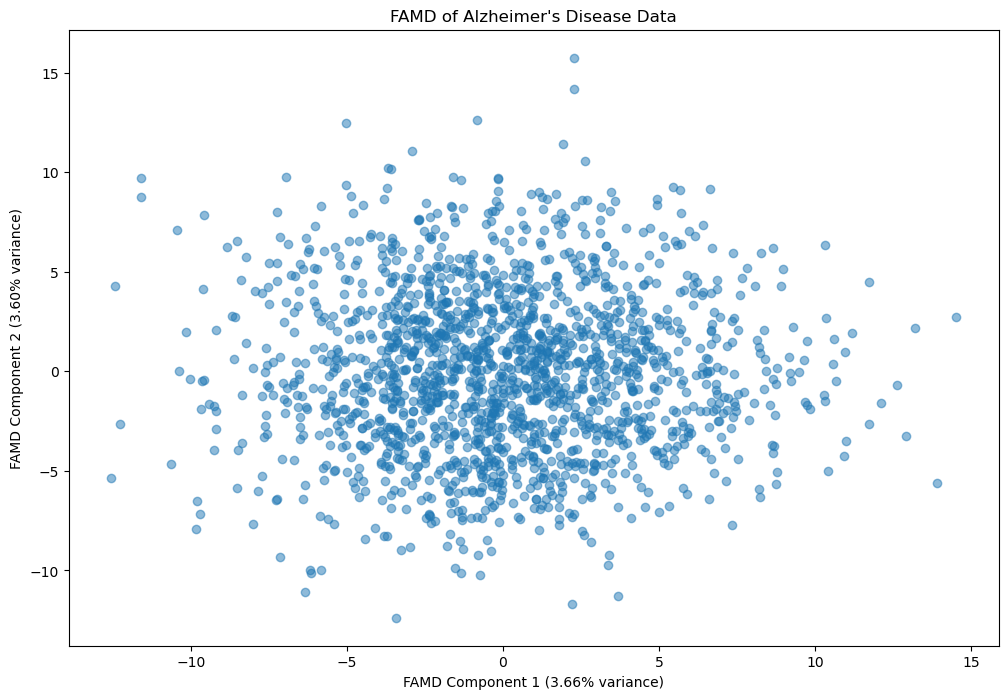

In [88]:
# Plotting the results with explained variance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(x_famd[0], x_famd[1], alpha=0.5)
plt.xlabel(f'FAMD Component 1 ({explained_variance_ratio[0]*100:.2f}% variance)')
plt.ylabel(f'FAMD Component 2 ({explained_variance_ratio[1]*100:.2f}% variance)')
plt.title('FAMD of Alzheimer\'s Disease Data')
plt.savefig('FAMDScatter.png', format='png')
plt.show()

In [225]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1719 entries, 780 to 802
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1719 non-null   int64   
 1   Gender                     1719 non-null   category
 2   Ethnicity                  1719 non-null   category
 3   EducationLevel             1719 non-null   category
 4   BMI                        1719 non-null   float64 
 5   Smoking                    1719 non-null   category
 6   AlcoholConsumption         1719 non-null   float64 
 7   PhysicalActivity           1719 non-null   float64 
 8   DietQuality                1719 non-null   float64 
 9   SleepQuality               1719 non-null   float64 
 10  FamilyHistoryAlzheimers    1719 non-null   category
 11  CardiovascularDisease      1719 non-null   category
 12  Diabetes                   1719 non-null   category
 13  Depression                 1719 non-n

In [227]:
col=famd.column_coordinates_
col

component,0,1
variable,,
BMI,0.003133,0.000121
AlcoholConsumption,0.000004,0.000510
PhysicalActivity,0.002071,0.000016
DietQuality,0.000122,0.001167
SleepQuality,0.000324,0.000300
CholesterolLDL,0.000933,0.000388
CholesterolHDL,0.001519,0.000242
CholesterolTriglycerides,0.000866,0.000090
FunctionalAssessment,0.001221,0.000295


In [229]:
#pip install kmodes

In [231]:
#pip install hdbscan

In [233]:
categorical_columns = ['Gender', 'EducationLevel','Ethnicity','Smoking','FamilyHistoryAlzheimers','CardiovascularDisease','Diabetes',
                      'Depression','HeadInjury','Hypertension','MemoryComplaints','BehavioralProblems',
                      'Confusion','Disorientation','PersonalityChanges','DifficultyCompletingTasks',
                      'Forgetfulness']
# Convert categorical columns to numeric codes for Gower distance calculation
for col in categorical_columns:
    x_train[col] = x_train[col].cat.codes

In [235]:
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, silhouette_samples

In [237]:
# Prepare data for K-prototypes
x_train_cat_indices = [x_train.columns.get_loc(col) for col in categorical_columns if col in x_train.columns]

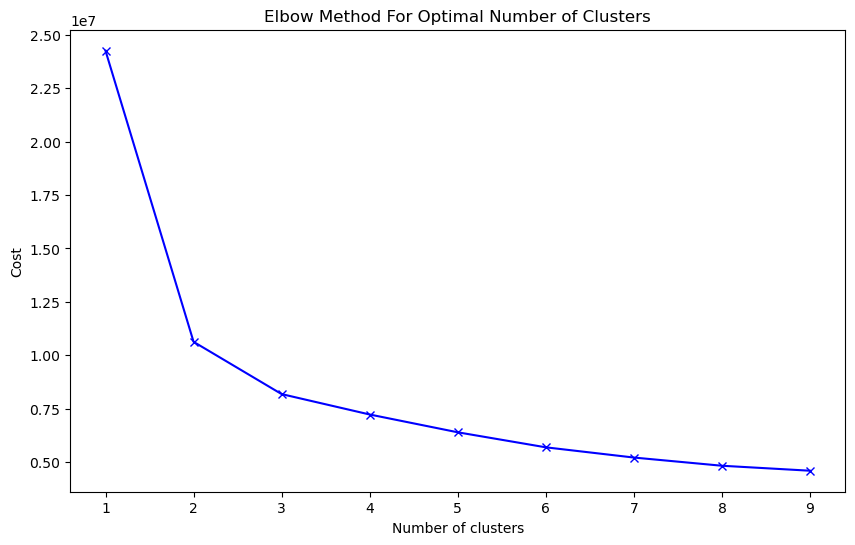

In [239]:
# Elbow method to determine the optimal number of clusters
cost = []
K = range(1, 10)

for num_clusters in K:
    kproto = KPrototypes(n_clusters=num_clusters, random_state=rs)
    kproto.fit_predict(x_train, categorical=x_train_cat_indices)
    cost.append(kproto.cost_)

plt.figure(figsize=(10, 6))
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.savefig('Elbow Method For Optimal Number of Clusters')
plt.show()


In [88]:
#!pip install kneed

In [89]:
# cost (sum distance): confirm visual clue of elbow plot
# KneeLocator class will detect elbows if curve is convex; if concave, will detect knees
!pip install kneed
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
        x=list(cost.keys()),
        y=list(cost.values()), 
        S=0.1, curve="convex", direction="decreasing", online=True)

K_cost_c3 = cost_knee_c3.elbow   
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

AttributeError: 'list' object has no attribute 'keys'

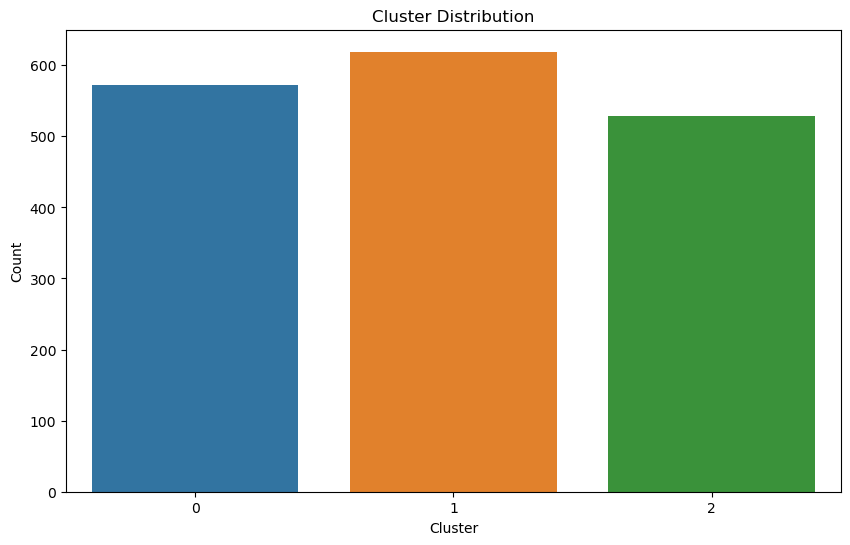

In [241]:
# Apply K-prototypes clustering with the chosen number of clusters (e.g., 3)
optimal_clusters = 3  # Set this to the optimal number of clusters found
kproto = KPrototypes(n_clusters=optimal_clusters, random_state=rs)
clusters = kproto.fit_predict(x_train, categorical=x_train_cat_indices)
x_train['Cluster'] = clusters

# Plotting the cluster distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=x_train)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [243]:
categorical_columns = ['Gender', 'EducationLevel','Ethnicity','Smoking','FamilyHistoryAlzheimers','CardiovascularDisease','Diabetes',
                      'Depression','HeadInjury','Hypertension','MemoryComplaints','BehavioralProblems',
                      'Confusion','Disorientation','PersonalityChanges','DifficultyCompletingTasks',
                      'Forgetfulness']
# Encode categorical variables for silhouette score calculation
x_train_encoded = x_train.copy()
for col in categorical_columns:
    le = LabelEncoder()
    x_train_encoded[col] = le.fit_transform(x_train_encoded[col])

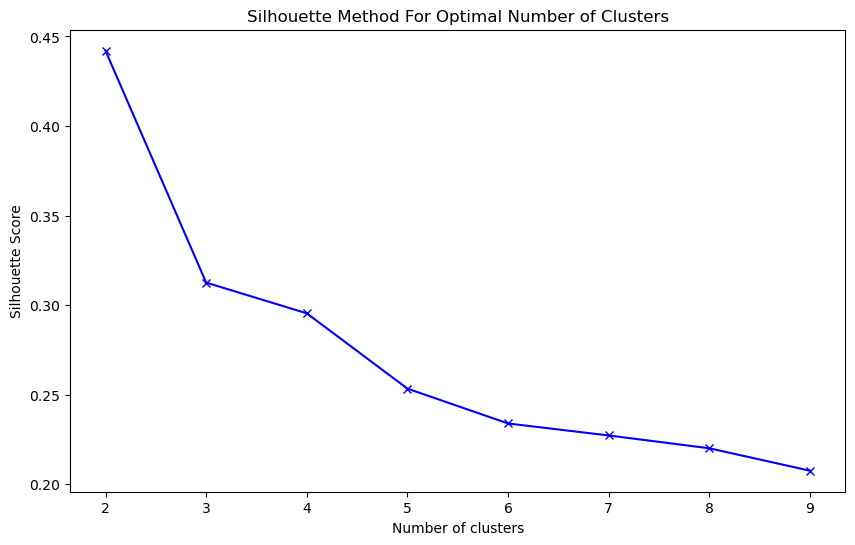

In [245]:
# Silhouette method to determine the optimal number of clusters
silhouette_scores = []

for num_clusters in range(2, 10):
    kproto = KPrototypes(n_clusters=num_clusters, random_state=rs)
    clusters = kproto.fit_predict(x_train, categorical=x_train_cat_indices)
    score = silhouette_score(x_train_encoded, clusters, metric='euclidean')
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal Number of Clusters')
plt.show()


In [247]:
# Calculate silhouette width
silhouette_avg = silhouette_score(x_train_encoded, clusters)
silhouette_values = silhouette_samples(x_train_encoded, clusters)

print(f"The average silhouette score for {optimal_clusters} clusters is: {silhouette_avg}")

The average silhouette score for 3 clusters is: 0.2076053540386063


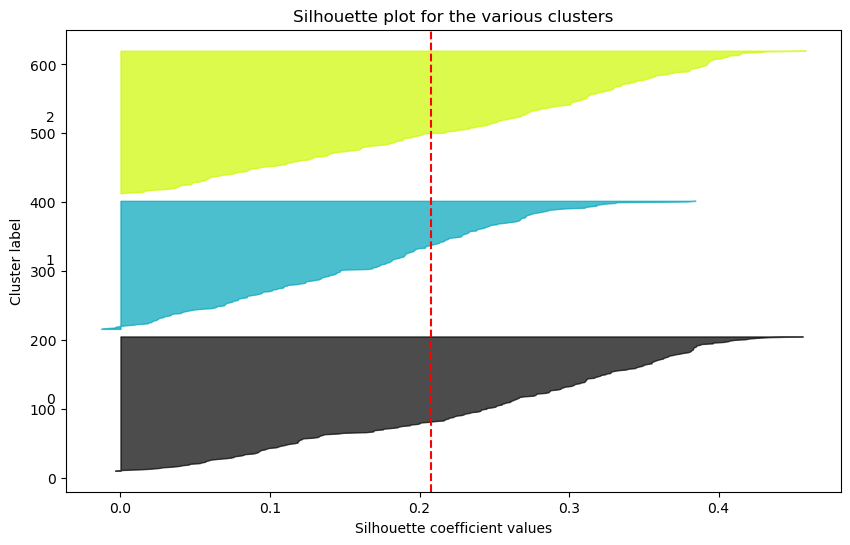

In [249]:
# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(optimal_clusters):
    ith_cluster_silhouette_values = silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / optimal_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title("Silhouette plot for the various clusters")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.savefig('Silhoute Score Plot')
plt.show()

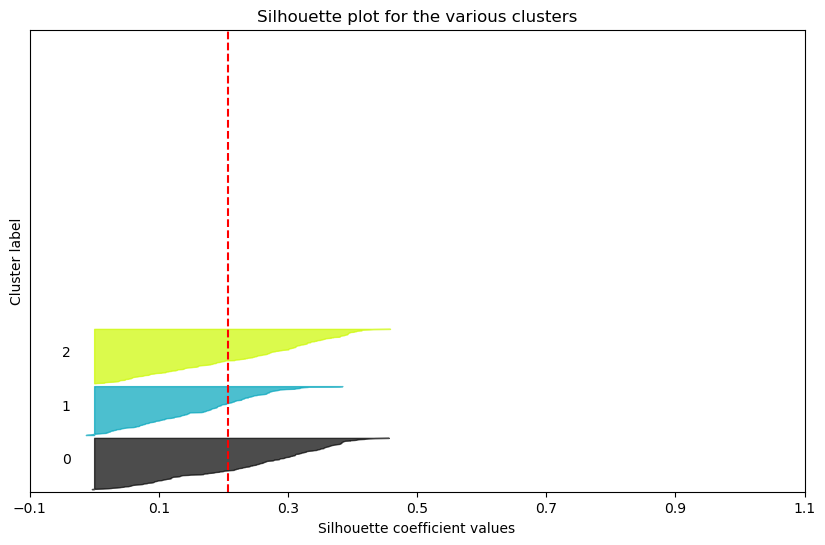

In [251]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate silhouette width for the optimal number of clusters
silhouette_avg = silhouette_score(x_train_encoded, clusters)
silhouette_values = silhouette_samples(x_train_encoded, clusters)

# Number of clusters
n_clusters = optimal_clusters

# Create a subplot with 1 row and 1 column
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 6)

# Set the y-axis limits
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(x_train_encoded) + (n_clusters + 1) * 10])

# Initialize y_lower to plot the silhouette scores
y_lower = 10

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = silhouette_values[clusters == i]

    # Sort the silhouette values
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with cluster numbers
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

# Plot the vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_title("Silhouette plot for the various clusters")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# Clear the y-axis labels
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

# Display the plot
plt.show()

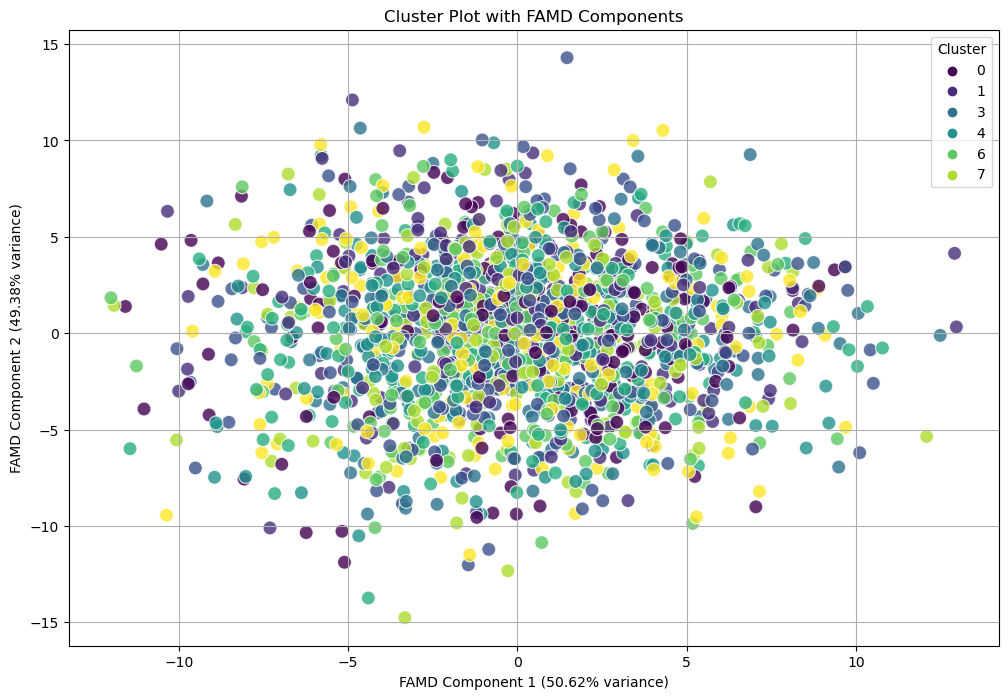

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of the clusters with different colors
plt.figure(figsize=(12, 8))

# Plot each cluster with a different color
sns.scatterplot(x=x_famd[0], y=x_famd[1], hue=clusters, palette='viridis', s=100, alpha=0.8)

# Labeling the plot
plt.xlabel(f'FAMD Component 1 ({explained_variance_ratio[0]*100:.2f}% variance)')
plt.ylabel(f'FAMD Component 2 ({explained_variance_ratio[1]*100:.2f}% variance)')
plt.title('Cluster Plot with FAMD Components')
plt.legend(title='Cluster')
plt.grid(True)

# Save and show the plot
plt.savefig('Cluster_FAMD_Scatter.png', format='png')
plt.show()

In [286]:
#####################

In [96]:
column_names = x_train.columns
print(column_names)

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE',
       'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL',
       'Confusion', 'Disorientation', 'PersonalityChanges',
       'DifficultyCompletingTasks', 'Forgetfulness'],
      dtype='object')


In [98]:
import altair as alt

IndexError: string index out of range

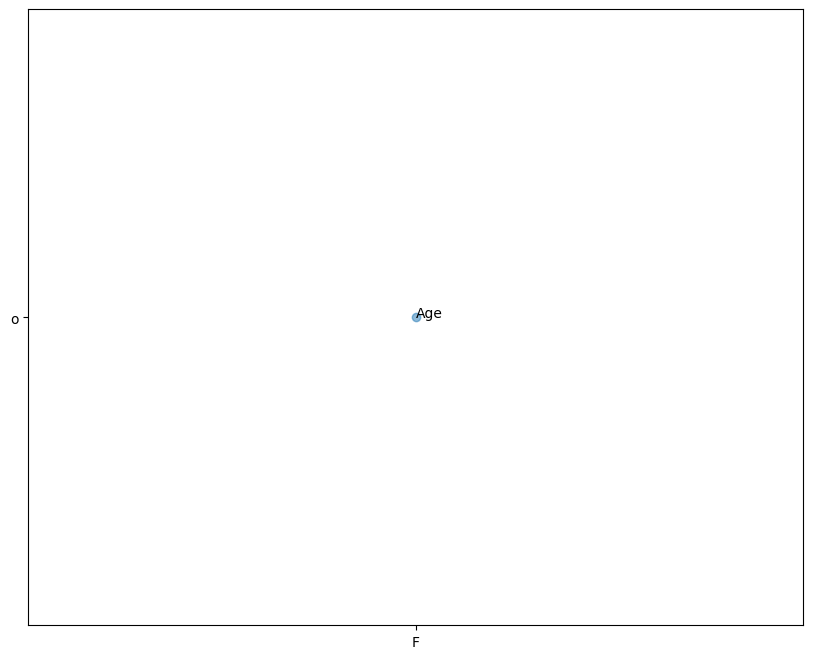

In [100]:
# Plot the variables in the FAMD space
plt.figure(figsize=(10, 8))
plt.scatter(col[0], col[1], alpha=0.5)

# Add labels for each point (variable)
for i, txt in enumerate(x_train.columns):
    plt.annotate(txt, (col[0][i], col[1][i]))

# Plot the component 1 and component 2 points
#plt.scatter(famd.row_coordinates_[0], famd.row_coordinates_[1], color='red', label='Component 1 and Component 2')

# Extract the percentages
percentage_dimension1 = explained_variance_ratio[0]*100
percentage_dimension2 = explained_variance_ratio[1]*100

plt.title('Variables in Component 1 and Component 2 Plot (FAMD)')
#xlabel = 'Dimension 1' + " " + percentage_dimension1
plt.xlabel('Dimension 1' + " " + str(percentage_dimension1)+"%")
plt.ylabel('Dimension 2' + " " + str(percentage_dimension2)+"%")


#plt.title('Variables in Component 1 and Component 2 Plot (FAMD)')
#plt.xlabel('Dimension 1')
#plt.ylabel('Dimension 2')
#plt.legend()
plt.grid(True)
plt.savefig('FAMD_Variables_Plot.png')
plt.show()

In [102]:
percentage_dimension1

NameError: name 'percentage_dimension1' is not defined

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ADL', ylabel='Count'>

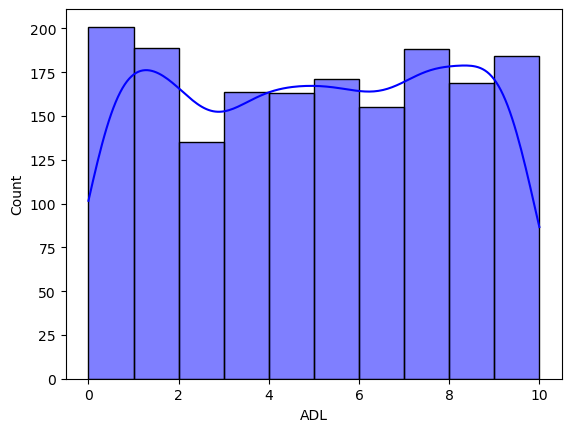

In [735]:
# Histogram for the amount of hemoglobin in the blood, crucial for oxygen transport.
sns.histplot(x=x_train["ADL"], bins=10, kde=True, color='blue', edgecolor='black')

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


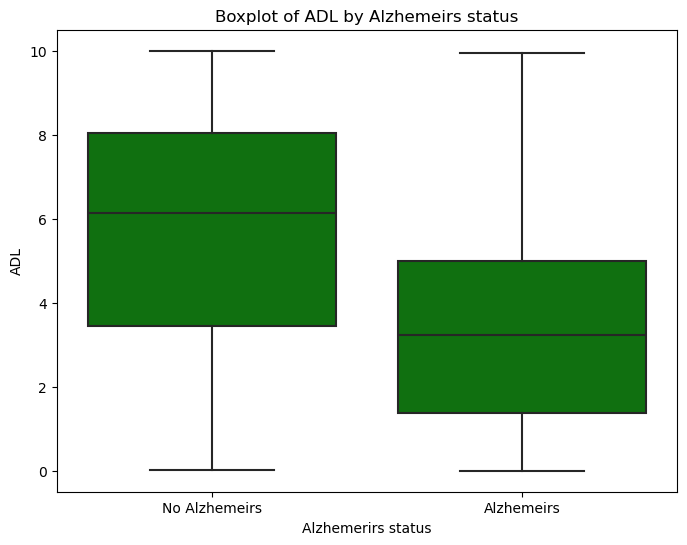

In [741]:
## boxplots of ADL and diagnosis
# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diagnosis', y='ADL', data=df2, color = 'green')

# Set the tick labels for the x-axis
plt.gca().set_xticklabels(['No Alzhemeirs', 'Alzhemeirs'])
plt.xlabel('Alzhemerirs status')
plt.ylabel('ADL')
plt.title('Boxplot of ADL by Alzhemeirs status')
plt.show()

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [47]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y,random_state=42)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1719 entries, 780 to 802
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1719 non-null   int64   
 1   Gender                     1719 non-null   category
 2   Ethnicity                  1719 non-null   category
 3   EducationLevel             1719 non-null   category
 4   BMI                        1719 non-null   float64 
 5   Smoking                    1719 non-null   category
 6   AlcoholConsumption         1719 non-null   float64 
 7   PhysicalActivity           1719 non-null   float64 
 8   DietQuality                1719 non-null   float64 
 9   SleepQuality               1719 non-null   float64 
 10  FamilyHistoryAlzheimers    1719 non-null   category
 11  CardiovascularDisease      1719 non-null   category
 12  Diabetes                   1719 non-null   category
 13  Depression                 1719 non-n

In [48]:
# Define which columns are numerical and which are categorical
numerical_features = x_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = x_train.select_dtypes(include=['category']).columns

In [49]:
numerical_features

Index(['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides', 'FunctionalAssessment',
       'ADL'],
      dtype='object')

In [50]:
categorical_features

Index(['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'MMSE', 'MemoryComplaints',
       'BehavioralProblems', 'Confusion', 'Disorientation',
       'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness'],
      dtype='object')

In [51]:
# Preprocessing for numerical data (scaling)
numerical_transformer = StandardScaler()

# Preprocessing for categorical data (one-hot encoding)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [52]:
# Create a pipeline with preprocessing and the RandomForest classifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=15643))
])

In [53]:
# Fit the model
rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides', 'FunctionalAssessment',
       'ADL'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ig...
                                                  Index(['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'MMSE', 'MemoryComplaints',
       'BehavioralProblems', 'Confusion', 'Disorientation',
       'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=15643))])

In [54]:
# Predict on the test data
y_pred = rf_pipeline.predict(x_train)

In [55]:
# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.2f}")
y_test

Accuracy: 1.00


451     1
2080    1
1656    1
1070    1
830     1
       ..
1797    0
1424    0
108     1
1816    0
162     0
Name: Diagnosis, Length: 430, dtype: category
Categories (2, int64): [0, 1]

In [56]:
print("\nClassification Report:")
print(classification_report(y_train, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1111
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1719
   macro avg       1.00      1.00      1.00      1719
weighted avg       1.00      1.00      1.00      1719



In [57]:
# Predict on the test data
y_pred2 = rf_pipeline.predict(x_test)


In [58]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


In [59]:
# Detailed evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))

Confusion Matrix:
[[270   8]
 [ 12 140]]


In [60]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       278
           1       0.95      0.92      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.95      0.95      0.95       430



In [39]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [40]:
# Create a pipeline with preprocessing, SMOTE, and the RandomForest classifier
rf_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=15643)),
    ('classifier', RandomForestClassifier(random_state=15643))
])

In [41]:
# Fit the model
rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides', 'FunctionalAssessment',
       'ADL'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ig...
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'MMSE', 'MemoryComplaints',
       'BehavioralProblems', 'Confusion', 'Disorientation',
       'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=15643)),
                ('classifier', RandomForestClassifier(random_state=15643))])

In [42]:
# Predict on the training data
y_pred = rf_pipeline.predict(x_train)
# Evaluate the model on training data
accuracy = accuracy_score(y_train, y_pred)
print(f"Training Accuracy: {accuracy:.2f}")

Training Accuracy: 1.00


In [43]:
print("\nClassification Report:")
print(classification_report(y_train, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1111
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1719
   macro avg       1.00      1.00      1.00      1719
weighted avg       1.00      1.00      1.00      1719



In [44]:
# Predict on the test data
y_pred2 = rf_pipeline.predict(x_test)

# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred2)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.95


In [45]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       278
           1       0.94      0.92      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430



In [46]:
#####################

In [47]:
# Apply the preprocessing to the training data
x_train_transformed = preprocessor.fit_transform(x_train)

# Apply the preprocessing to the test data
x_test_transformed = preprocessor.transform(x_test)

In [48]:
# Apply SMOTE to the transformed training data
smote = SMOTE(random_state=15643)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_transformed, y_train)

In [52]:
x_train_resampled

array([[ 1.23072095,  0.06546577,  1.47821408, ...,  0.        ,
         0.        ,  1.        ],
       [-1.43084133,  0.07006505, -0.40743202, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.01083824, -0.31694129, -0.28833407, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.22142744, -0.41393706,  1.24558235, ...,  0.        ,
         0.48315628,  0.51684372],
       [-1.42852857, -0.24757897, -0.28115919, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98690798, -0.40720601,  1.2931555 , ...,  0.        ,
         1.        ,  0.        ]])

In [49]:
# Fit the RandomForest model on the resampled training data
rf_classifier = RandomForestClassifier(random_state=15643)
rf_classifier.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=15643)

In [50]:
# Predict on the original training data
y_train_pred = rf_classifier.predict(x_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 1.00


In [51]:
# Predict on the test data
y_test_pred = rf_classifier.predict(x_test_transformed)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.95


## Lasso for imbalanced data

In [52]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

In [53]:
lasso_logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l1', solver='saga', C=1.0, random_state=15643, max_iter=10000)) 
])


In [54]:
# Fit the model on the training data
lasso_logistic_pipeline.fit(x_train, y_train)

# Predict on the test data
y_pred = lasso_logistic_pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.89
Confusion Matrix:
[[259  19]
 [ 29 123]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       278
           1       0.87      0.81      0.84       152

    accuracy                           0.89       430
   macro avg       0.88      0.87      0.88       430
weighted avg       0.89      0.89      0.89       430



In [ ]:
## For balanced data

In [55]:
# Create a pipeline with preprocessing, SMOTE, and the RandomForest classifier
lasso_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=15643)),
    ('classifier', LogisticRegression(penalty='l1', solver='saga', C=1.0, random_state=15643, max_iter=10000))
])

In [56]:
# Fit the model on the training data
lasso_pipeline.fit(x_train, y_train)

# Predict on the test data
y_pred = lasso_logistic_pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.89
Confusion Matrix:
[[259  19]
 [ 29 123]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       278
           1       0.87      0.81      0.84       152

    accuracy                           0.89       430
   macro avg       0.88      0.87      0.88       430
weighted avg       0.89      0.89      0.89       430



In [22]:
##################################### new

In [61]:
## Random Forest Without balancing

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [63]:
# Define which columns are numerical and which are categorical
numerical_features = x_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = x_train.select_dtypes(include=['category']).columns

In [64]:
# Preprocessing for numerical data (scaling)
numerical_transformer = StandardScaler()

# Preprocessing for categorical data (one-hot encoding)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [65]:
# Create a pipeline with preprocessing and the RandomForest classifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=15643))
])

In [66]:
# Fit the model
rf_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides', 'FunctionalAssessment',
       'ADL'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ig...
                                                  Index(['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'MMSE', 'MemoryComplaints',
       'BehavioralProblems', 'Confusion', 'Disorientation',
       'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=15643))])

In [67]:
# Predict on the training data
y_pred = rf_pipeline.predict(x_train)
# Evaluate the model on training data
accuracy = accuracy_score(y_train, y_pred)
print(f"Training Accuracy: {accuracy:.2f}")

Training Accuracy: 1.00


In [68]:
print("\nClassification Report:")
print(classification_report(y_train, y_pred,digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1111
           1     1.0000    1.0000    1.0000       608

    accuracy                         1.0000      1719
   macro avg     1.0000    1.0000    1.0000      1719
weighted avg     1.0000    1.0000    1.0000      1719



In [69]:
# Predict on the training data
y_pred_test = rf_pipeline.predict(x_test)
# Evaluate the model on training data
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {accuracy:.2f}")

Training Accuracy: 0.95


In [70]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test,digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.9574    0.9712    0.9643       278
           1     0.9459    0.9211    0.9333       152

    accuracy                         0.9535       430
   macro avg     0.9517    0.9461    0.9488       430
weighted avg     0.9534    0.9535    0.9533       430



In [72]:
## KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
# Create a pipeline with preprocessing and the KNN classifier
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # You can set n_neighbors as needed
])

# Fit the model
knn_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides', 'FunctionalAssessment',
       'ADL'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ig...
                                                  Index(['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'MMSE', 'MemoryComplaints',
       'BehavioralProblems', 'Confusion', 'Disorientation',
       'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness'],
      dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [75]:
# Predict on the training data
y_pred = knn_pipeline.predict(x_train)
# Evaluate the model on training data
accuracy = accuracy_score(y_train, y_pred)
print(f"Training Accuracy: {accuracy:.2f}")

Training Accuracy: 0.85


In [76]:
print("\nClassification Report:")
print(classification_report(y_train, y_pred, digits=4))



Classification Report:
              precision    recall  f1-score   support

           0     0.8495    0.9298    0.8878      1111
           1     0.8449    0.6990    0.7651       608

    accuracy                         0.8482      1719
   macro avg     0.8472    0.8144    0.8265      1719
weighted avg     0.8479    0.8482    0.8444      1719



In [77]:
# Predict on the test data
y_pred_test = knn_pipeline.predict(x_test)
# Evaluate the model on test data
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, digits=4))

Test Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0     0.7553    0.8993    0.8210       278
           1     0.7172    0.4671    0.5657       152

    accuracy                         0.7465       430
   macro avg     0.7362    0.6832    0.6934       430
weighted avg     0.7418    0.7465    0.7308       430



In [71]:
columns_to_remove = ['FunctionalAssessment', 'ADL', 'CholesterolLDL', 'CholesterolHDL','SystolicBP',
                    'DiastolicBP','CholesterolTriglycerides']
X_train_rem = x_train.drop(columns=columns_to_remove)
X_test_rem = x_test.drop(columns=columns_to_remove)

In [78]:
X_train_rem

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,HeadInjury,Hypertension,MMSE,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
780,86,0,2,1,28.155961,0,18.629164,6.535593,1.316452,9.620590,...,0,0,0,0,0,0,0,0,0,1
1341,62,1,0,3,28.189210,1,7.763349,1.913491,6.023577,5.039160,...,0,0,0,0,0,0,0,0,0,0
820,75,0,0,0,25.391526,0,8.449637,9.549369,1.774418,7.951681,...,0,0,0,0,0,0,0,0,0,0
857,89,0,0,0,23.581751,0,1.939227,1.322465,8.758693,9.262999,...,0,0,1,1,0,0,1,0,0,1
593,76,1,0,2,38.768590,1,9.013919,8.296794,7.892595,5.928934,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,60,0,0,1,31.425226,0,1.742579,2.689362,3.266146,5.880669,...,0,0,0,0,0,0,0,0,0,0
711,60,0,0,0,20.352158,0,16.789335,3.376786,1.736764,7.633571,...,0,0,0,0,0,0,0,1,0,1
199,75,1,3,1,20.623038,1,5.959683,9.874975,1.484483,9.443387,...,0,0,0,0,0,0,0,0,0,0
319,76,1,0,0,33.598266,0,5.284436,9.476723,2.873511,6.415073,...,0,0,0,0,0,1,0,0,0,0


In [71]:
# Define which columns are numerical and which are categorical
numerical_features_rem = X_train_rem.select_dtypes(include=['float64', 'int64']).columns
categorical_features_rem = X_train_rem.select_dtypes(include=['category']).columns

In [79]:
# Preprocessing for numerical data (scaling)
numerical_transformer = StandardScaler()

# Preprocessing for categorical data (one-hot encoding)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features_rem),
        ('cat', categorical_transformer, categorical_features_rem)
    ])

In [80]:
# Create a pipeline with preprocessing and the RandomForest classifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=15643))
])

In [81]:
# Fit the model
rf_pipeline.fit(X_train_rem, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'MMSE', 'MemoryComplaints',
       'BehavioralProblems', 'Confusion', 'Disorientation',
       'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=15643))])

In [82]:
# Predict on the training data
y_pred = rf_pipeline.predict(X_train_rem)
# Evaluate the model on training data
accuracy = accuracy_score(y_train, y_pred)
print(f"Training Accuracy: {accuracy:.2f}")

Training Accuracy: 1.00


In [83]:
print("\nClassification Report:")
print(classification_report(y_train, y_pred,digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1111
           1     1.0000    1.0000    1.0000       608

    accuracy                         1.0000      1719
   macro avg     1.0000    1.0000    1.0000      1719
weighted avg     1.0000    1.0000    1.0000      1719



In [84]:
# Predict on the training data
y_pred_test = rf_pipeline.predict(X_test_rem)
# Evaluate the model on training data
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Training Accuracy: {accuracy:.2f}")

Training Accuracy: 0.77


In [85]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test,digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.7853    0.8813    0.8305       278
           1     0.7203    0.5592    0.6296       152

    accuracy                         0.7674       430
   macro avg     0.7528    0.7203    0.7301       430
weighted avg     0.7623    0.7674    0.7595       430



In [93]:
#After applying smote
#!pip install imbalanced-learn

In [94]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [95]:
x_train = x_train.astype(float)

In [96]:
smote = SMOTE(random_state=15643)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [97]:
from collections import Counter

print("Original dataset shape:", Counter(y_train))
print("Resampled dataset shape:", Counter(y_train_resampled))

Original dataset shape: Counter({0: 1111, 1: 608})
Resampled dataset shape: Counter({0: 1111, 1: 1111})


In [98]:
##extract numerical and categorical variables from x_train
##numerical
df2 =X_train_resampled[['Age', 'BMI', 'AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality','SystolicBP','DiastolicBP',
               'CholesterolLDL','CholesterolHDL','CholesterolTriglycerides','FunctionalAssessment','ADL']]          
###categorical
df3=X_train_resampled[['Gender','Ethnicity','EducationLevel','Smoking','FamilyHistoryAlzheimers','CardiovascularDisease','MMSE','MemoryComplaints',
        'PersonalityChanges','BehavioralProblems',
        'Diabetes','Depression','HeadInjury','Hypertension','Confusion','Disorientation','DifficultyCompletingTasks','Forgetfulness']]

In [99]:
#####scale the features
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled_s = scaler.fit_transform(X_train_resampled)
X_test_scaled_s = scaler.transform(x_test)

In [100]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=15643)

# Train the model
rf.fit(X_train_scaled_s, y_train_resampled)

RandomForestClassifier(random_state=15643)

In [101]:
####predict on train data
y_pred_tr = rf.predict(X_train_scaled_s)
y_pred = rf.predict(X_test_scaled_s)

accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy test:", accuracy_test)
accuracy_train = accuracy_score(y_train_resampled, y_pred_tr)
print("Accuracy train:", accuracy_train)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_pred,y_test)

print("Confusion Matrix:")
print(conf_matrix)


Accuracy test: 0.9488372093023256
Accuracy train: 1.0
Confusion Matrix:
[[270  14]
 [  8 138]]


In [102]:
####F1 score test
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred,digits=4)
print("test set")
print(report)
#f1 score train
report1=classification_report(y_train_resampled,y_pred_tr,digits=4)
print("train set")
print(report1)

test set
              precision    recall  f1-score   support

           0     0.9507    0.9712    0.9609       278
           1     0.9452    0.9079    0.9262       152

    accuracy                         0.9488       430
   macro avg     0.9480    0.9396    0.9435       430
weighted avg     0.9488    0.9488    0.9486       430

train set
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1111
           1     1.0000    1.0000    1.0000      1111

    accuracy                         1.0000      2222
   macro avg     1.0000    1.0000    1.0000      2222
weighted avg     1.0000    1.0000    1.0000      2222



In [75]:
## Lasso

In [112]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

In [113]:
lasso_logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l1', solver='saga', C=1.0, random_state=15643, max_iter=10000)) 
])


In [117]:
# Fit the model on the training data
lasso_logistic_pipeline.fit(x_train, y_train)

# Predict on the test data
y_pred = lasso_logistic_pipeline.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred,digits=4))

Accuracy: 0.89
Confusion Matrix:
[[258  20]
 [ 29 123]]
Classification Report:
              precision    recall  f1-score   support

           0     0.8990    0.9281    0.9133       278
           1     0.8601    0.8092    0.8339       152

    accuracy                         0.8860       430
   macro avg     0.8795    0.8686    0.8736       430
weighted avg     0.8852    0.8860    0.8852       430



In [118]:
# Predict on the test data
y_pred_tr = lasso_logistic_pipeline.predict(x_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred_tr)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_tr))
print("Classification Report:")
print(classification_report(y_train, y_pred_tr,digits=4))

Accuracy: 0.90
Confusion Matrix:
[[1040   71]
 [  95  513]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9163    0.9361    0.9261      1111
           1     0.8784    0.8438    0.8607       608

    accuracy                         0.9034      1719
   macro avg     0.8974    0.8899    0.8934      1719
weighted avg     0.9029    0.9034    0.9030      1719



In [119]:
## Lasso after smote

In [120]:
# Initialize the Random Forest Classifier
lasso = LogisticRegression(penalty='l1', solver='saga', C=1.0, random_state=15643, max_iter=10000)

# Train the model
lasso.fit(X_train_scaled_s, y_train_resampled)

LogisticRegression(max_iter=10000, penalty='l1', random_state=15643,
                   solver='saga')

In [121]:
####predict on train data
y_pred_tr = lasso.predict(X_train_scaled_s)
y_pred = lasso.predict(X_test_scaled_s)

accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy test:", accuracy_test)
accuracy_train = accuracy_score(y_train_resampled, y_pred_tr)
print("Accuracy train:", accuracy_train)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_pred,y_test)

print("Confusion Matrix:")
print(conf_matrix)


Accuracy test: 0.8930232558139535
Accuracy train: 0.8928892889288929
Confusion Matrix:
[[246  14]
 [ 32 138]]


In [122]:
####F1 score test
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred,digits=4)
print("test set")
print(report)
#f1 score train
report1=classification_report(y_train_resampled,y_pred_tr,digits=4)
print("train set")
print(report1)

test set
              precision    recall  f1-score   support

           0     0.9462    0.8849    0.9145       278
           1     0.8118    0.9079    0.8571       152

    accuracy                         0.8930       430
   macro avg     0.8790    0.8964    0.8858       430
weighted avg     0.8986    0.8930    0.8942       430

train set
              precision    recall  f1-score   support

           0     0.9053    0.8776    0.8912      1111
           1     0.8812    0.9082    0.8945      1111

    accuracy                         0.8929      2222
   macro avg     0.8933    0.8929    0.8929      2222
weighted avg     0.8933    0.8929    0.8929      2222



In [123]:
## Random forest with grid search

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [126]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=15643)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [10, 20, 30],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],       # Number of features to consider at each split
    'bootstrap': [True, False]              # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [127]:
####F1 score test
y_pred = best_rf.predict(x_test)
y_pred_tr = best_rf.predict(x_train)
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred,digits=4)
print("test set")
print(report)
#f1 score train
report1=classification_report(y_train,y_pred_tr,digits=4)
print("train set")
print(report1)

test set
              precision    recall  f1-score   support

           0     0.9541    0.9712    0.9626       278
           1     0.9456    0.9145    0.9298       152

    accuracy                         0.9512       430
   macro avg     0.9498    0.9428    0.9462       430
weighted avg     0.9511    0.9512    0.9510       430

train set
              precision    recall  f1-score   support

           0     0.9991    0.9991    0.9991      1111
           1     0.9984    0.9984    0.9984       608

    accuracy                         0.9988      1719
   macro avg     0.9987    0.9987    0.9987      1719
weighted avg     0.9988    0.9988    0.9988      1719



In [128]:
## random forest grid search with smote

In [129]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=15643)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [10, 20, 30],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],       # Number of features to consider at each split
    'bootstrap': [True, False]              # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled_s,y_train_resampled)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled_s)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [131]:
####F1 score test
y_pred = best_rf.predict(X_test_scaled_s)
y_pred_tr = best_rf.predict(X_train_scaled_s)
####F1 score test
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred,digits=4)
print("test set")
print(report)
#f1 score train
report1=classification_report(y_train_resampled,y_pred_tr,digits=4)
print("train set")
print(report1)

test set
              precision    recall  f1-score   support

           0     0.9507    0.9712    0.9609       278
           1     0.9452    0.9079    0.9262       152

    accuracy                         0.9488       430
   macro avg     0.9480    0.9396    0.9435       430
weighted avg     0.9488    0.9488    0.9486       430

train set
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1111
           1     1.0000    1.0000    1.0000      1111

    accuracy                         1.0000      2222
   macro avg     1.0000    1.0000    1.0000      2222
weighted avg     1.0000    1.0000    1.0000      2222

